<a href="https://colab.research.google.com/github/priyabrata-maity/PM10/blob/main/TSFTask_Stock_Market_%26_News_Headline_Prediction_using_Numerical_and_Textual_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Priyabrata Maity

#The Sparks Foundation

#Stock Market & News Headline Prediction using Numerical and Textual Analysis


In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame


start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2020, 1, 11)

df = web.DataReader("AAPL", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,73.704819
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.358185
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,74.538239
2020-01-09,77.607498,76.550003,76.809998,77.407501,170108400.0,76.121498
2020-01-10,78.167503,77.062500,77.650002,77.582497,140644800.0,76.293579


This piece of code will pull 10 years data from January 2010 until January 2020. Feel free to tweak the start and end date as you see necessary. For the rest of analysis, we will use the Closing Price which remarks the final price in which the stocks are traded by the end of the day.

## Exploring Rolling Mean and Return Rate of Stocks

In this analysis, we analyse stocks using two key measurements: Rolling Mean and Return Rate.

### Rolling Mean (Moving Average) — to determine trend

Rolling mean/Moving Average (MA) smooths out price data by creating a constantly updated average price. This is useful to cut down “noise” in our price chart. Furthermore, this Moving Average could act as “Resistance” meaning from the downtrend and uptrend of stocks you could expect it will follow the trend and less likely to deviate outside its resistance point.

In [14]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()
mavg.head(20)

Date
2010-01-04   NaN
2010-01-05   NaN
2010-01-06   NaN
2010-01-07   NaN
2010-01-08   NaN
2010-01-11   NaN
2010-01-12   NaN
2010-01-13   NaN
2010-01-14   NaN
2010-01-15   NaN
2010-01-19   NaN
2010-01-20   NaN
2010-01-21   NaN
2010-01-22   NaN
2010-01-25   NaN
2010-01-26   NaN
2010-01-27   NaN
2010-01-28   NaN
2010-01-29   NaN
2010-02-01   NaN
Name: Adj Close, dtype: float64

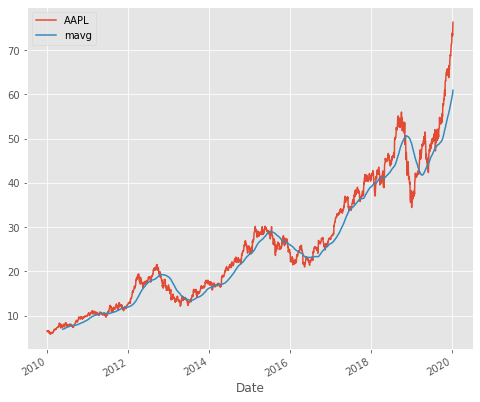

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()
plt.show()

The Moving Average makes the line smooth and showcase the increasing or decreasing trend of stocks price.
In this chart, the Moving Average showcases increasing trend the upturn or downturn of stocks price. Logically, you should buy when the stocks are experiencing downturn and sell when the stocks are experiencing upturn.

### Return Deviation — to determine risk and return

Expected Return measures the mean, or expected value, of the probability distribution of investment returns. The expected return of a portfolio is calculated by multiplying the weight of each asset by its expected return and adding the values for each investment — Investopedia.


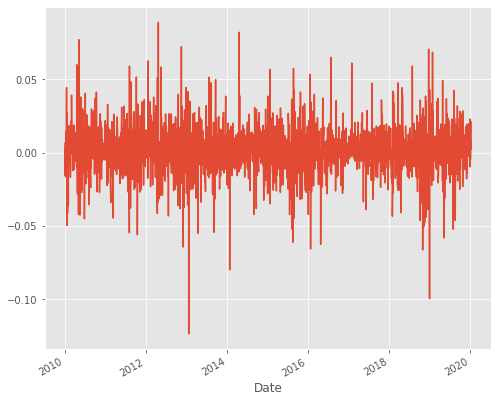

In [16]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')
plt.show()

Logically, our ideal stocks should return as high and stable as possible. If you are risk averse(like me), you might want to avoid this stocks as you saw the 10% drop in 2013. This decision is heavily subjected to your general sentiment of the stocks and competitor analysis.

## Analysing your Competitors Stocks
In this segment, we are going to analyse on how one company performs in relative with its competitor. Let’s assume we are interested in technology companies and want to compare the big guns: Apple, GE, Google, IBM, and Microsoft.

In [17]:
dfcomp = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'],'yahoo',start=start,end=end)['Adj Close']
dfcomp.head()

Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2010-01-04,6.539882,10.840267,312.204773,92.163887,24.105360
2010-01-05,6.551187,10.896401,310.829926,91.050545,24.113148
2010-01-06,6.446983,10.840267,302.994293,90.459076,23.965164
2010-01-07,6.435065,11.401575,295.940735,90.145927,23.715933
2010-01-08,6.477847,11.647147,299.885956,91.050545,23.879499


## Correlation Analysis — Does one competitor affect others?

We can analyse the competition by running the percentage change and correlation function in pandas. Percentage change will find how much the price changes compared to the previous day which defines returns. Knowing the correlation will help us see whether the returns are affected by other stocks’ returns

In [18]:
retscomp = dfcomp.pct_change()
corr = retscomp.corr()
retscomp.head(10)

Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.001729,0.005178,-0.004404,-0.012080,0.000323
2010-01-06,-0.015906,-0.005152,-0.025209,-0.006496,-0.006137
2010-01-07,-0.001849,0.051780,-0.023280,-0.003462,-0.010400
2010-01-08,0.006648,0.021538,0.013331,0.010035,0.006897
2010-01-11,-0.008822,0.009639,-0.001512,-0.010470,-0.012720
2010-01-12,-0.011375,0.000597,-0.017684,0.007955,-0.006608
2010-01-13,0.014106,0.003578,-0.005741,-0.002145,0.009312
2010-01-14,-0.005792,-0.007724,0.004701,0.015972,0.020099


To prove the positive correlations, we will use heat maps to visualize the correlation ranges among the competing stocks. Notice that the lighter the color, the more correlated the two stocks are.

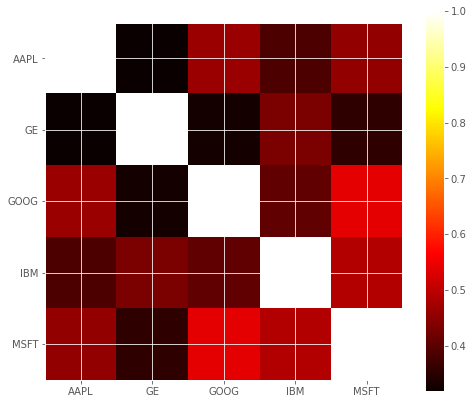

In [19]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

From the Scatter Matrix and Heatmap, we can find great correlations among the competing stocks. However, this might not show causality, and could just show the trend in the technology industry rather than show how competing stocks affect each other.

### Stocks Returns Rate and Risk
Apart from correlation, we also analyse each stock’s risks and returns. In this case we are extracting the average of returns (Return Rate) and the standard deviation of returns (Risk).

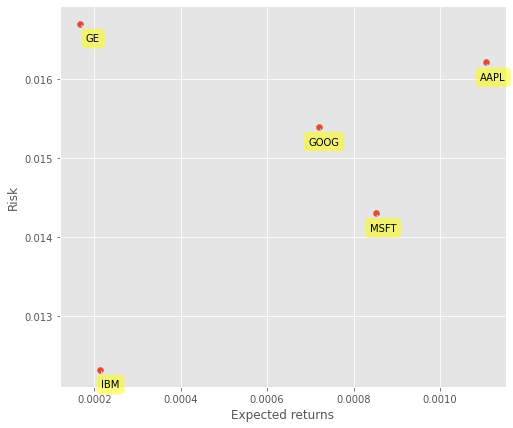

In [20]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

## India-News-Headlines file imported and doing Numerical Anaylsis.

In [21]:
df1 = pd.read_csv('india-news-headlines.csv')
df1.head(10)

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa
5,20010102,unknown,Extra buses to clear tourist traffic
6,20010102,unknown,Dilute the power of transfers; says Riberio
7,20010102,unknown,Focus shifts to teaching of Hindi
8,20010102,unknown,IT will become compulsory in schools
9,20010102,unknown,Move to stop freedom fighters' pension flayed


In [22]:
df1.tail(10)

,publish_date,headline_category,headline_text
1035416,20110119,india,US citizen held for murder
1035417,20110119,india,Grievance redressal cells to resolve
1035418,20110119,unknown,Nabi: The man for all seasons
1035419,20110119,city.delhi,Delhi Metro: Phase III to cover 105km now
1035420,20110119,city.delhi,Airport Metro faces delays
1035421,20110119,india,Mahapanchayat rejects govt assurance on CBI probe
1035422,20110119,india,Cold wave snuffs out 2 lives
1035423,20110119,india,3-member team to investigate gangrape charges
1035424,20110119,india,Farmer looted; shot dead
1035425,20110119,bu,NaN


In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035426 entries, 0 to 1035425
Data columns (total 3 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   publish_date       1035426 non-null  int64 
 1   headline_category  1035426 non-null  object
 2   headline_text      1035425 non-null  object
dtypes: int64(1), object(2)
memory usage: 23.7+ MB


In [24]:
df1.describe()

,publish_date
count,1.035426e+06
mean,2.006509e+07
std,3.035464e+04
min,2.001010e+07
25%,2.003112e+07
50%,2.007112e+07
75%,2.009072e+07
max,2.011012e+07


In [25]:
df1.max()

publish_date            20110119
headline_category    young-turks
dtype: object

In [26]:
df1.min()

publish_date                 20010101
headline_category    2008-in-pictures
dtype: object

In [27]:
df1['headline_category'].unique()

array(['sports.wwe', 'unknown', 'entertainment.hindi.bollywood', 'india',
       'city.bengaluru', 'city.patna', 'business.india-business',
       'entertainment.english.hollywood', 'city.delhi', 'edit-page',
       'sports.cricket.india-domestic.ranji-trophy', 'sports.football',
       'only-in-america', 'city.ahmedabad', 'jugular-vein', 'swaminomics',
       'city.thiruvananthapuram', 'city.pune', 'home.science',
       'city.mumbai', 'city.chandigarh', 'city.lucknow', 'city.kolkata',
       'city.hyderabad', 'cricket', 'business.international-business',
       'city', 'removed', 'home.sunday-times.deep-focus', 'bombay-times',
       'home.sunday-times.all-that-matters', 'home.education',
       'pune-times', 'calcutta-times', 'hyderabad-times',
       'bangalore-times', 'delhi-times', 'lucknow-times',
       'ahmedabad-times', 'citizens-grievances', 'anti-terror-law',
       'hyderabad.local-sports', 'sports.cricket.sri-lanka-in-india',
       'sports.hockey', 'blogs', 'home.sunday-

In [28]:
#In case of null values
df1.isna().any()

publish_date         False
headline_category    False
headline_text         True
dtype: bool

In [29]:
df1.corr()

,publish_date
publish_date,1.0


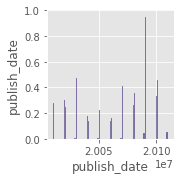

In [30]:
sns.set_palette('viridis')
sns.pairplot(df1)
plt.show()

In [31]:
df1['headline_text'].value_counts()

Sacred Space                                      47
City round up                                     45
It's a new kind of 'rat'h race                    43
Youngest user of fairness creams                  40
In Pics: The week gone by                         40
                                                  ..
Techno magic at IIT                                1
IAF's two new airbases in Rajasthan                1
Railways mechanical engineering jubilee            1
Sachin-Anjali: Jodi No 1                           1
Mutual funds reopen doors to arbitrage schemes     1
Name: headline_text, Length: 963078, dtype: int64

In [32]:
df1['headline_category'].value_counts()

india                                        142329
unknown                                      132881
business.india-business                       49689
city.delhi                                    45762
city.mumbai                                   41785
                                              ...  
sports.football.epl.interviews                    1
sports.cricket.west-indies-in-new-zealand         1
entertainment.beauty-pageants.news                1
life-style.health-fitness                         1
bu                                                1
Name: headline_category, Length: 396, dtype: int64

## Now we can do EDA (Exploratry Data Analysis) using NLP & NLTK tools

First, I’ll take a look at the number of characters present in each sentence. This can give us a rough idea about the news headline length.

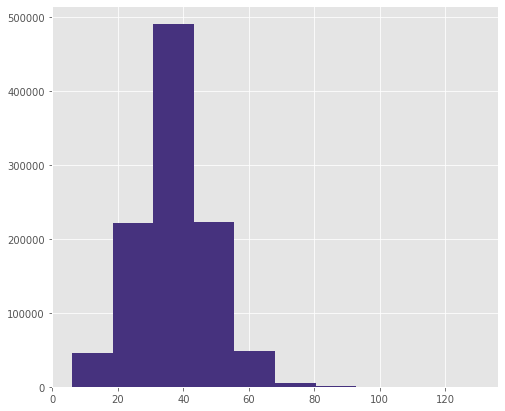

In [33]:
df1['headline_text'].str.len().hist()
plt.show()

The histogram shows that news headlines range from 10 to 70 characters and generally, it is between 25 to 55 characters.
Now, we will move on to data exploration at a word-level. Let’s plot the number of words appearing in each news headline.

The average word length ranges between 1 to 18 with 10 being the most common length. Does it mean that people are using really short words in news headlines?

Let’s find out.
One reason why this may not be true is stopwords. Stopwords are the words that are most commonly used in any language such as “the”,” a”,” an” etc. As these words are probably small in length these words may have caused the above graph to be left-skewed.

Analyzing the amount and the types of stopwords can give us some good insights into the data.
To get the corpus containing stopwords you can use the nltk library. Nltk contains stopwords from many languages. Since we are only dealing with English news I will filter the English stopwords from the corpus

In [36]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Now, we’ll create the corpus.

Now we know which stopwords occur frequently in our text, let’s inspect which words other than these stopwords occur frequently.
We will use the counter function from the collections library to count and store the occurrences of each word in a list of tuples. This is a very useful function when we deal with word-level analysis in natural language processing.

In [44]:
from collections import Counter
counter=Counter(corpus)
most=counter.most_common()
x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)
plt.show()

ValueError: ignored

Wow! The “Rs”, “India” and “held” dominate the headlines over the last 15 year but when we observe other words in the graph they are all related to the RS — India.

## Ngram exploration
Ngrams are simply contiguous sequences of n words. For example “riverbank”,” The three musketeers” etc.
If the number of words is two, it is called bigram. For 3 words it is called a trigram and so on.
Looking at most frequent n-grams can give you a better understanding of the context in which the word was used.

In [39]:
from nltk.util import ngrams
list(ngrams(['I' ,'went','to','the','river','bank'],2))

[('I', 'went'),
 ('went', 'to'),
 ('to', 'the'),
 ('the', 'river'),
 ('river', 'bank')]

To build a representation of our vocabulary we will use Countvectorizer. Countvectorizer is a simple method used to tokenize, vectorize and represent the corpus in an appropriate form. It is available in sklearn.feature_engineering.text
So with all this, we will analyze the top bigrams in our news headlines.

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]
top_n_bigrams=get_top_ngram(df1['headline_text'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)
plt.show()

ValueError: ignored

## Textblob
Textblob is a python library built on top of nltk. It has been around for some time and is very easy and convenient to use.
The sentiment function of TextBlob returns two properties:
polarity: is a floating-point number that lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.
subjectivity: refers to how someone’s judgment is shaped by personal opinions and feelings. Subjectivity is represented as a floating-point value which lies in the range of [0,1].
I will run this function on our news headlines.

In [41]:
from textblob import TextBlob
TextBlob('100 people killed in Iraq').sentiment

Sentiment(polarity=-0.2, subjectivity=0.0)

In [42]:
def polarity(text):
    return TextBlob(text).sentiment.polarity
df1['polarity_score']=df1['headline_text'].\
   apply(lambda x : polarity(x))
df1['polarity_score'].hist()
plt.show()

TypeError: ignored

You can see that the polarity mainly ranges between 0.00 and 0.20. This indicates that the majority of the news headlines are neutral.
Let’s dig a bit deeper by classifying the news as negative, positive and neutral based on the scores.

In [ ]:
def sentiment(x):
    if x<0:
        return 'neg'
    elif x==0:
        return 'neu'
    else:
        return 'pos'
    
df1['polarity']=df1['polarity_score'].\
   map(lambda x: sentiment(x))
plt.bar(df1.polarity.value_counts().index,
        df1.polarity.value_counts())
plt.show()

Yep, 70 % of news is neutral with only 18% of positive and 11% of negative.
Let’s take a look at some of the positive and negative headlines.

In [ ]:
df1[df1['polarity']=='pos']['headline_text'].head()

In [ ]:
df1[df1['polarity']=='neg']['headline_text'].head()

We discussed and implemented various exploratory data analysis methods for text data. Some common, some lesser-known but all of them could be a great addition to your data exploration toolkit.